In [1]:
import pandas as pd
import os
import numpy as np
import numpy as np
import seaborn as sns

#import bamboolib

In [2]:
#Path of data

aymeric = "/home/aymeric/python-scripts/anses_medialab/datas/"

In [3]:
df_tweet = pd.read_csv(f"{aymeric}tweets_pesticides/annotation_compte_twitter.csv", sep = ",")
df_tweet.columns

Index(['cluster_id', 'data', 'user_name', 'Comment', 'Type_entite', 'Genre',
       'User_role2', 'User_role', 'Orientation', 'thematique', 'theme_rec',
       'theme_rec2', 'Scale', 'Locality', 'associated_fb_url',
       'associated_website', 'Stake_holder_anses', 'user_account_url',
       'user_screen_name', 'user_location', 'user_id', 'user_verified',
       'user_description', 'user_url', 'user_image', 'user_tweets',
       'user_followers', 'user_friends', 'user_likes', 'user_lists',
       'user_created_at', 'user_timestamp_utc', 'quoted_user_id',
       'user_id_size', 'user_retweet_count_sum', 'user_ratio_glypho', 'weight',
       'density', 'id', 'world', 'theme', 'annotator', 'annotation_id',
       'created_at', 'updated_at', 'lead_time'],
      dtype='object')

In [4]:
df_tweet["world"] = df_tweet["world"].str.replace('\{"choices": \[', "")
df_tweet["world"]
df_tweet["world"] = df_tweet["world"].str.replace('\]\}', "")
df_tweet["world"]
df_tweet["world"] = df_tweet["world"].str.replace('\"', "")
df_tweet["world"] = df_tweet["world"].str.split(',')
df_tweet

/tmp/ipykernel_30227/637638899.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tweet["world"] = df_tweet["world"].str.replace('\{"choices": \[', "")
/tmp/ipykernel_30227/637638899.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tweet["world"] = df_tweet["world"].str.replace('\]\}', "")


,cluster_id,data,user_name,Comment,Type_entite,Genre,User_role2,User_role,Orientation,thematique,...,weight,density,id,world,theme,annotator,annotation_id,created_at,updated_at,lead_time
0,NaN,NaN,Aloe-vera Bien-être,NaN,Personne,NaN,Promoteur,Activités industrielles ou commerciales,NaN,NaN,...,NaN,NaN,999,[Les mondes économiques],Produits pharmaceutiques et cosmétiques,2,502,2022-06-21T09:57:20.280498Z,2022-06-21T09:57:20.280534Z,6.453
1,NaN,NaN,Podeus #JeSuisVacciné #pfizerisé 💉,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,998,[Les mondes rationalistes],Rationaliste,2,501,2022-06-21T09:57:12.985394Z,2022-06-21T09:57:12.985450Z,13.813
2,NaN,NaN,julien_54 🌾🌽🚜🏍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,997,[Les mondes agricoles],Défense des agricultures conventionnelles,2,500,2022-06-21T09:56:58.123226Z,2022-06-21T09:56:58.123306Z,25.632
3,NaN,NaN,Emmanuel Comte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,996,[Les mondes économiques],Santé,2,499,2022-06-21T09:56:31.670855Z,2022-06-21T09:56:31.670890Z,12.157
4,NaN,NaN,Gilles Callot 🇫🇷🇪🇺💉💉,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,995,[Les mondes rationalistes],Rationaliste,2,498,2022-06-21T09:56:18.451434Z,2022-06-21T09:56:18.451467Z,15.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,1.0,Delphine Batho & sudic lisette,Cricri,NaN,Personne,Homme,Commentateur,NaN,actualité,actualité,...,"0,01889285762","0,79195819",505,"[Les mondes rationalistes, Les mondes scienti...",Rationaliste,2,7,2022-06-20T16:28:58.541706Z,2022-06-20T16:28:58.541827Z,37.582
460,0.0,Emmanuelle Ducros & JF Proust,jason hunt #lanceurd'avenir,NaN,Personne,Homme,Commentateur,NaN,actualité,actualité,...,"0,0089341265","0,8023743698",504,[Les mondes rationalistes],Rationaliste,2,6,2022-06-20T16:28:19.869011Z,2022-06-20T16:28:19.869045Z,24.838
461,0.0,Emmanuelle Ducros & JF Proust,Géraldine Woessner,NaN,Personne,Femme,Journalistes,Journalistes,actualité,actualité,...,"0,01081644427","0,8023743698",503,[Les mondes de l'information],Actualité,2,5,2022-06-20T16:27:54.118494Z,2022-06-20T16:27:54.118537Z,13.235
462,0.0,Emmanuelle Ducros & JF Proust,Antoine d'Abbundo,La Croix,Personne,Homme,Journalistes,Journalistes,actualité,actualité,...,"0,01318537461","0,8023743698",502,[Les mondes de l'information],Actualité,2,4,2022-06-20T16:27:39.651029Z,2022-06-20T16:27:39.651061Z,15.460


In [5]:
df_tweet["User_world"] = np.nan
df_tweet["User_world2"] =np.nan

for x, world in enumerate(df_tweet["world"]):
    if type(world) is float:
        df_tweet["User_world"].iloc[x] =np.nan
        df_tweet["User_world2"].iloc[x] =np.nan
        
    else:
        if len(world) == 1:
            df_tweet["User_world"].iloc[x] = world[0].strip()
            df_tweet["User_world2"].iloc[x] = world[0].strip()
        elif len(world) > 1 :
            df_tweet["User_world"].iloc[x] = world[0].strip()
            df_tweet["User_world2"].iloc[x] = world[1].strip()
        elif len(world) == 0 :
            df_tweet["User_world"].iloc[x] =np.nan
            df_tweet["User_world2"].iloc[x] =np.nan
        



/home/aymeric/anaconda3/envs/analyse_tweets/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
df_tweet.columns

Index(['cluster_id', 'data', 'user_name', 'Comment', 'Type_entite', 'Genre',
       'User_role2', 'User_role', 'Orientation', 'thematique', 'theme_rec',
       'theme_rec2', 'Scale', 'Locality', 'associated_fb_url',
       'associated_website', 'Stake_holder_anses', 'user_account_url',
       'user_screen_name', 'user_location', 'user_id', 'user_verified',
       'user_description', 'user_url', 'user_image', 'user_tweets',
       'user_followers', 'user_friends', 'user_likes', 'user_lists',
       'user_created_at', 'user_timestamp_utc', 'quoted_user_id',
       'user_id_size', 'user_retweet_count_sum', 'user_ratio_glypho', 'weight',
       'density', 'id', 'world', 'theme', 'annotator', 'annotation_id',
       'created_at', 'updated_at', 'lead_time', 'User_world', 'User_world2'],
      dtype='object')

In [7]:
df_fb = pd.read_csv(f"{aymeric}datas_facebook/annotation_compte_facebook.csv", sep = ",")
df_fb.columns

Index(['account_url', 'account_name', 'Comment', 'Type_entite', 'Head',
       'Genre', 'User_role', 'Mondes', 'account_description', 'Orientation',
       'thematique', 'Scale', 'Locality', 'account_a_propos',
       'associated_twitter', 'associated_website', 'Stake_holder_anses',
       'account_ct_id', 'account_id', 'account_platform', 'account_name.1',
       'account_handle', 'account_profile_image', 'account_subscriber_count',
       'account_verified', 'account_type', 'account_page_admin_top_country',
       'account_publication', 'total_posts', 'ratio_posts'],
      dtype='object')

In [8]:
df_fb = df_fb.loc[df_fb["Type_entite"].isna() == False]

In [9]:
df_fb["User_world"] = np.nan
df_fb["User_world2"] =np.nan

df_fb["world"] = df_fb["Mondes"].str.split('|')

for x, world in enumerate(df_fb["world"]):
    if type(world) is float:
        df_fb["User_world"].iloc[x] =np.nan
        df_tweet["User_world2"].iloc[x] =np.nan
        
    else:
        if len(world) == 1:
            df_fb["User_world"].iloc[x] = world[0]
            df_fb["User_world2"].iloc[x] = world[0]
        elif len(world) > 1 :
            df_fb["User_world"].iloc[x] = world[0]
            df_fb["User_world2"].iloc[x] = world[1]
        elif len(world) == 0 :
            df_fb["User_world"].iloc[x] =np.nan
            df_tweet["User_world2"].iloc[x] =np.nan

In [10]:
df_tweet.columns

Index(['cluster_id', 'data', 'user_name', 'Comment', 'Type_entite', 'Genre',
       'User_role2', 'User_role', 'Orientation', 'thematique', 'theme_rec',
       'theme_rec2', 'Scale', 'Locality', 'associated_fb_url',
       'associated_website', 'Stake_holder_anses', 'user_account_url',
       'user_screen_name', 'user_location', 'user_id', 'user_verified',
       'user_description', 'user_url', 'user_image', 'user_tweets',
       'user_followers', 'user_friends', 'user_likes', 'user_lists',
       'user_created_at', 'user_timestamp_utc', 'quoted_user_id',
       'user_id_size', 'user_retweet_count_sum', 'user_ratio_glypho', 'weight',
       'density', 'id', 'world', 'theme', 'annotator', 'annotation_id',
       'created_at', 'updated_at', 'lead_time', 'User_world', 'User_world2'],
      dtype='object')

In [11]:
df_fb = df_fb[['account_url', 'account_name', 'Comment', 'Type_entite',
       'Genre', 'User_role', 'world',
               'User_world',
               'User_world2',
               'account_description', 'Orientation',
       'thematique', 'account_a_propos',
       'associated_twitter', 'associated_website',
        'account_id', 'account_platform', 
       'account_handle', 'account_type', 'account_page_admin_top_country',
       'account_publication', 'total_posts', 'ratio_posts', ]]

In [12]:
df_tweet = df_tweet[['user_name', 'Comment', 'Type_entite', 'Genre',
    'User_role', 'world','User_world', 'User_world2', 'Orientation', 'associated_fb_url',
       'associated_website', 'user_account_url',
       'user_screen_name', 'user_location', 'user_id',
       'user_description', 'user_url', 'user_tweets',
       'user_created_at', 
       'user_id_size', 'user_ratio_glypho',  'theme']]

In [13]:
len(df_tweet.columns)

22

In [14]:
df_tweet = df_tweet.rename(columns={
    'user_tweets': 'user_total_post',
       'user_id_size' : 'user_total_pest_posts', 
    'user_ratio_glypho': 'user_ratio_pest_posts', 
    'theme' : 'main_thematic'})

df_tweet["platform"] = "twitter"

df_fb = df_fb.rename(columns={
       'account_url' : "user_account_url", 
    'account_name': 'user_name', 
    'account_description' : 'user_tag',
    'thematique': 'main_thematic', 
    'account_a_propos': 'user_description',
    'associated_twitter' : 'associated_tw_url',
        'account_id': 'user_id', 
    'account_platform' : "platform", 
    'account_handle': 'user_screen_name',
    'account_publication': 'user_total_pest_posts', 
    'total_posts' : 'user_total_posts', 
    'ratio_posts' : 'user_ratio_pest_posts'
})

In [15]:
df_fb['platform']


0      Facebook
1      Facebook
2      Facebook
3      Facebook
4      Facebook
         ...   
404    Facebook
406    Facebook
430    Facebook
441    Facebook
603    Facebook
Name: platform, Length: 230, dtype: object

In [16]:
df = pd.concat([df_tweet, df_fb])
df.to_csv("fb_and_tw_annotated_account.csv", sep = "\t")

In [17]:
df.groupby(['User_world','User_role','platform']).size()#.sort_values(ascending=False)

User_world                   User_role                                            platform
Les mondes agricoles         Activités industrielles ou commerciales              twitter       5
                             Expertise                                            Facebook      4
                                                                                  twitter       1
                             Exploitant.e agricole                                twitter      63
                             Groupement de producteurs et productrices agricoles  Facebook      7
                                                                                  twitter       2
                             Institutions et organismes publics                   twitter       2
                             Journalistes                                         twitter       2
                             Média                                                twitter      11
                           

In [18]:
dft = df.loc[df["platform"] == "Facebook"]
dft = dft[["user_name","User_world", "User_role"]].dropna()

In [19]:
dft

,user_name,User_world,User_role
0,Phyto Paris,Les mondes économiques,Activités industrielles ou commerciales
1,Rambo Côte d’Ivoire,Les mondes économiques,Activités industrielles ou commerciales
2,Campagne Glyphosate 83,Les mondes critiques,mouvements sociaux
3,Campagne Glyphosate Réunion,Les mondes critiques,mouvements sociaux
4,Secrets Toxiques,Les mondes critiques,mouvements sociaux
...,...,...,...
344,José Bové,Les mondes politiques,Partis et personnalités politiques
375,"Pierre Rabhi, au nom de la terre - Le film",Les mondes de l'information,Média
404,Le Jeune Engagé,Les mondes critiques,Commentateur
441,Sos-Loue Rivières Comtoises,Les mondes critiques,mouvements sociaux


In [20]:
len(result.columns)

NameError: name 'result' is not defined

In [108]:
# Create a pivot table
dft = dft.groupby(['User_world','User_role']).count().reset_index()
dft
result = dft.pivot(index='User_world',columns='User_role',values='user_name')#.fillna(0)
#result = result + result.T #get a symmetric matrix
result
dft

,User_world,User_role,user_name
0,Les mondes agricoles,Expertise,4
1,Les mondes agricoles,Groupement de producteurs et productrices agri...,7
2,Les mondes agricoles,Syndicat agricole,1
3,Les mondes agricoles,chambre d'agriculture,2
4,Les mondes critiques,Commentateur,1
5,Les mondes critiques,Expertise,1
6,Les mondes critiques,Exploitation agricole,1
7,Les mondes critiques,Syndicat agricole,2
8,Les mondes critiques,mouvements sociaux,117
9,Les mondes de l'information,Auteur.trice et réalisateur.trices,1


In [109]:
result.index

Index(['Les mondes agricoles', 'Les mondes critiques',
       'Les mondes de l'information', 'Les mondes institutionnels',
       'Les mondes politiques', 'Les mondes rationalistes',
       'Les mondes scientifiques', 'Les mondes économiques'],
      dtype='object', name='User_world')

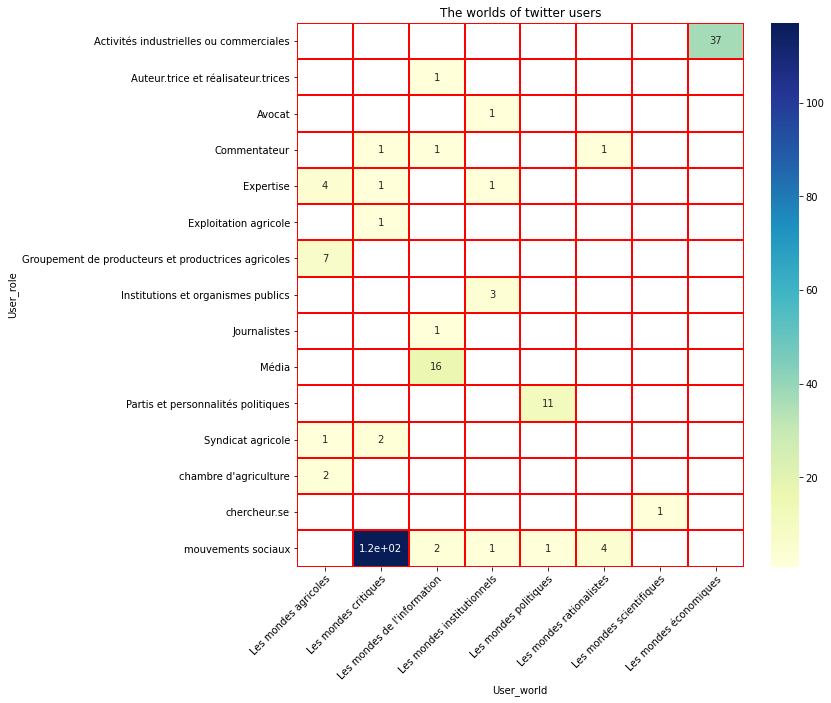

In [110]:
import matplotlib
import matplotlib.pyplot as plt

column_name = result.columns
row_name = result.index

plt.rcParams["figure.figsize"] = (10,10)
fig = plt.subplots()

ax = sns.heatmap(result.T, annot=True,  cmap="YlGnBu", linewidths=2, linecolor='red')


# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(),  ha="right", rotation = 45,
         rotation_mode="anchor")



ax.set_title("The worlds of twitter users")

plt.show()


In [268]:
m = result.to_numpy

In [297]:

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

User_world2
Les mondes agricoles           True
Les mondes critiques           True
Les mondes de l'information    True
Les mondes institutionnels     True
Les mondes politiques          True
Les mondes rationalistes       True
Les mondes scientifiques       True
Les mondes économiques         True
dtype: bool

In [ ]:
result